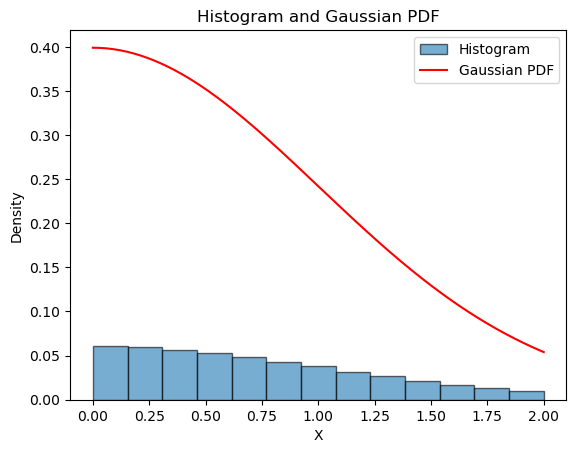

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

# 生成数据
X = np.random.normal(0, 1, size=100000)

# 定义直方图参数
nb_batons = 13  # 区间数量
gauche = 0      # 左边界
droite = 2      # 右边界
bins = np.linspace(gauche, droite, nb_batons + 1)  # 分箱
step = (droite - gauche) / nb_batons               # 每个区间的宽度

# 权重，用于归一化直方图，使其表示概率密度
weights = np.ones_like(X) / len(X)

# 绘制归一化直方图
plt.hist(X, bins=bins, weights=weights, edgecolor="k", alpha=0.6, label="Histogram")

# 绘制正态分布密度函数
x = np.linspace(gauche, droite, 200)
gaussian_density = norm.pdf(x, loc=0, scale=1)  # loc为均值，scale为标准差
plt.plot(x, gaussian_density, label="Gaussian PDF", color="red")

# 添加图例和标签
plt.legend()
plt.xlabel("X")
plt.ylabel("Density")
plt.title("Histogram and Gaussian PDF")
plt.show()


In [7]:
import numpy as np

# 目标分布的密度函数 f(x)
def f(x):
    return np.exp(-x**2)

# 简单分布的密度函数 g(x)（例如均匀分布）
def g(x):
    return 1  # 假设 g(x) 是在 [0,1] 上均匀分布

# 常数 M（确保 M * g(x) >= f(x)）
M = 1.0  # 这里假设 M=1 是合适的

# 拒绝采样函数
def rejet():
    while True:
        X = np.random.uniform(0, 1)  # 从 g(x) 采样
        U = np.random.uniform(0, M * g(X))  # 从 [0, M * g(X)] 中采样
        if U <= f(X):  # 接受条件
            return X

# 生成 1000 个样本
samples = [rejet() for _ in range(1000)]


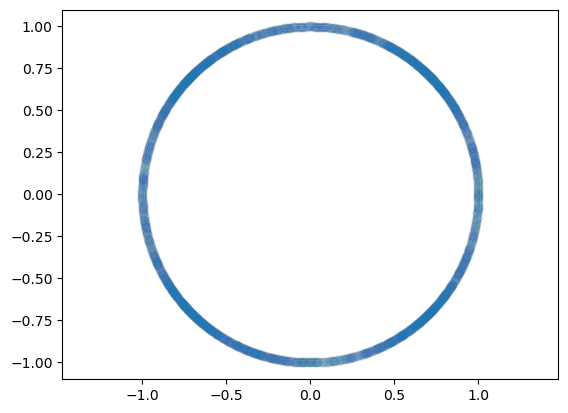

In [9]:
n = 10000

X = np.random.uniform(-1, +1, n)
Y = np.random.uniform(-1, +1, n)
N = np.sqrt(X**2 + Y**2)

plt.plot(X/N, Y/N, "o", alpha=0.01)
plt.axis('equal')
plt.show()

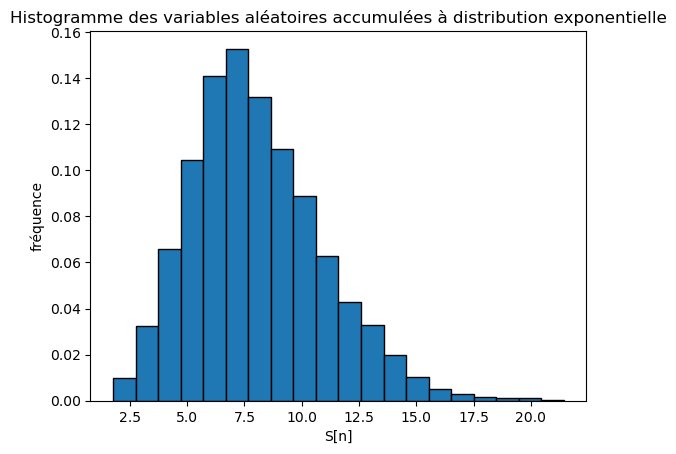

In [11]:
# 重置环境
%reset -f

import numpy as np
np.set_printoptions(precision=2, suppress=True)
import matplotlib.pyplot as plt
import scipy.stats as stats

# 定义参数
""" 累加的随机变量数量 """
n = 8
""" 执行累加操作的次数。
由于我们需要展示一个分布，因此必须进行多次尝试（"essaies" 在英语中意为尝试） """
nbEssaies = 3000

collect = []
for i in range(nbEssaies):
    X = np.random.exponential(size=n)
    S = np.sum(X)
    collect.append(S)

plt.hist(collect, 20, density=True, edgecolor="k")
plt.xlabel('S[n]')
plt.ylabel('fréquence')
plt.title('Histogramme des variables aléatoires accumulées à distribution exponentielle')
plt.show()

In [12]:
import torch

class Model(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = torch.nn.Linear(1, 1)

    def forward(self, x):
        return self.layer(x)

# 创建模型和优化器
model = Model()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# 训练数据
X_train = torch.rand(100, 1)
Y_train = 2 * X_train + 3 + torch.randn(100, 1) * 0.1

# 训练模型
for _ in range(1000):
    pred = model(X_train)
    loss = torch.mean((pred - Y_train) ** 2)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

# 查看结果
print("模型参数：", model.layer.weight.item(), model.layer.bias.item())


模型参数： 3.090360403060913 2.380171775817871
